In [1]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from gradcam import VizGradCAM
import tensorflow as tf

2022-04-20 16:06:51.250520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-20 16:06:51.250544: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# IMG_SIZE = (28, 28)
# IMG_SIZE = (56, 56)
IMG_SIZE = (224, 224)

In [3]:
# model = load_model('es_func_folder_x3.h5')
# model = load_model('es_func_exp.h5')  
# model = load_model('es_func_folder_56x3.h5')
# model = load_model('es_func_folder_224x3_c.h5')
# model = load_model('korea_224.h5') # 48%
# model = load_model('korea_224_lr-4.h5')  # 74%
# model = load_model('korea_224_lr-4_step30-5.h5') # 74%
# model = load_model('korea_224_lr-4_step30-5_no_ROP.h5') # 60%
# model = load_model('korea_224_lr-4_k.h5') # 100%
model = load_model('es_func_folder_224x3_lr-04_ROP.h5') 97%

2022-04-20 16:06:53.163367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:
2022-04-20 16:06:53.163423: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 16:06:53.163454: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a): /proc/driver/nvidia/version does not exist
2022-04-20 16:06:53.163809: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def gradcam_viz(model, image):
    last_conv_layer = next(
        x for x in model.layers[::-1] if isinstance(x, tf.keras.layers.Conv2D)
    )
    grad_model = tf.keras.Model(
        [model.inputs], [last_conv_layer.output, model.output]
    )
    pred = model.predict(img)
    pred = np.argmax(pred[0])
    with tf.GradientTape() as tape:
        last_conv_out, prediction = grad_model(img)
        loss = prediction[:, pred]
    grads = tape.gradient(loss, last_conv_out)  
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    last_conv_out = last_conv_out[0]
    heatmap = last_conv_out @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    plt.imshow(heatmap.numpy(), cmap='gray')

In [5]:
def prediction(img_path):
    img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    img = np.array(img)/255
    # img = np.array(img)  # for es_func_exp.h5
    pred = model.predict(np.expand_dims(img, axis=0))
    return np.argmax(pred)

In [6]:
folder = 'img_st/'
files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

/tmp/ipykernel_154498/1973891.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')


9w.png


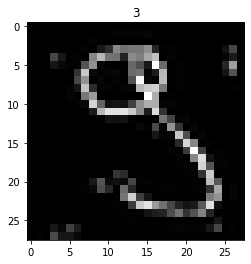

In [7]:
count = 0
for i in range(0, len(files)):
    res = prediction(os.path.join(folder, files[i]))
    if int(files[i][0]) == res:
        count += 1
    else: 
        dig = files[i]
        print(dig)
        plt.imshow(cv2.imread(os.path.join(folder, dig)))
        plt.title(res)
        plt.show()

In [8]:
print (count / len(files) * 100, '%')

97.14285714285714 %


In [9]:
files.sort()

In [10]:
for f in files:
    print(f, prediction(os.path.join(folder, f)), sep='  ')

0.png  0


/tmp/ipykernel_154498/1973891.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')


0i.png  0
0zero.png  0
1.png  1
1i.png  1
1one.png  1
1oneone.png  1
2.png  2
2i.png  2
2two.png  2
3.png  3
3i.png  3
3three.png  3
4.png  4
4four.png  4
4i.png  4
5.png  5
5b.png  5
5five.png  5
5i.png  5
5w.png  5
6.png  6
6i.png  6
6six.png  6
7.png  7
77.png  7
7i.png  7
7seven.png  7
8.png  8
8eight.png  8
8i.png  8
9.png  9
9i.png  9
9nine.png  9
9w.png  3


/tmp/ipykernel_154498/3633682978.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')


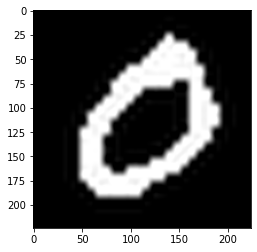

0.png


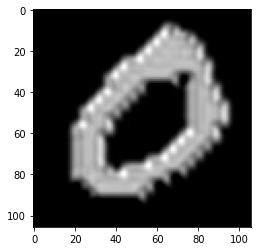

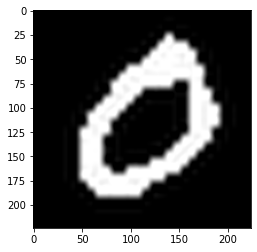

0i.png


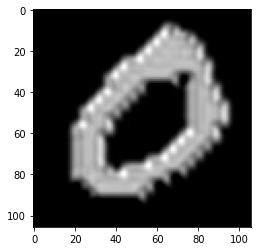

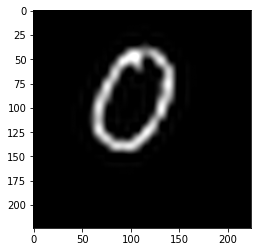

0zero.png


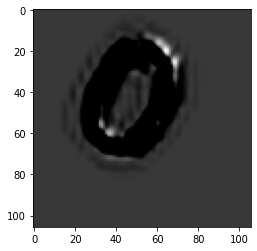

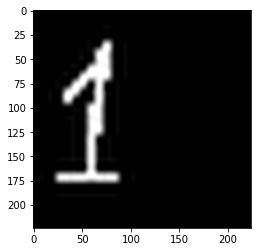

1.png


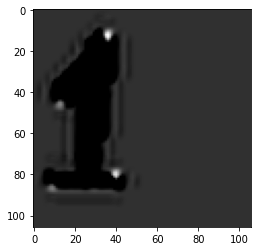

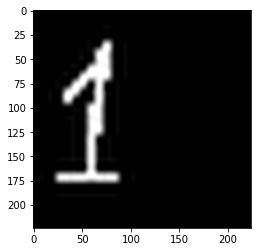

1i.png


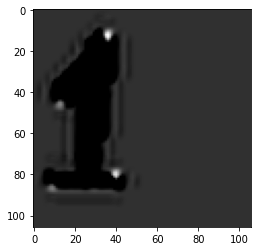

1one.png


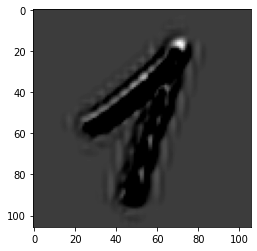

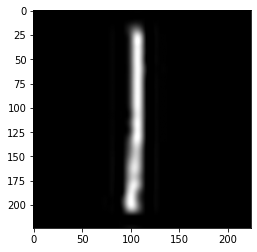

1oneone.png


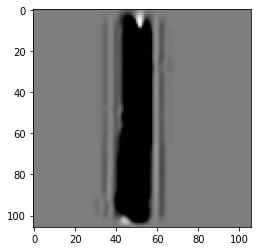

2.png


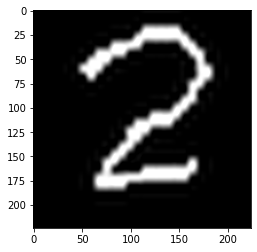

2i.png


2two.png


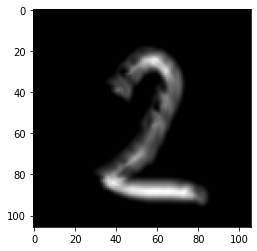

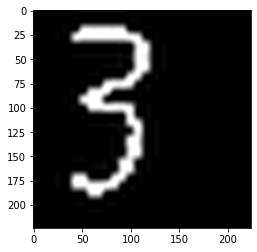

3.png


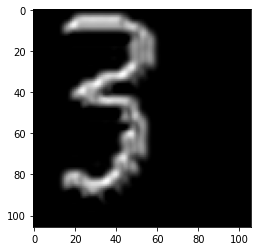

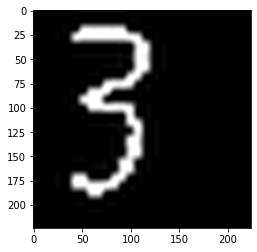

3i.png


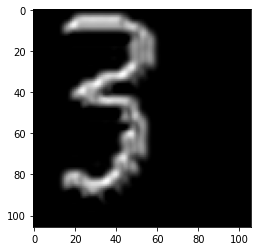

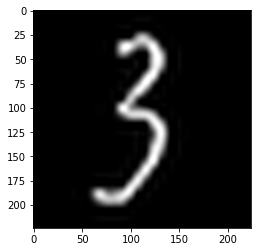

3three.png


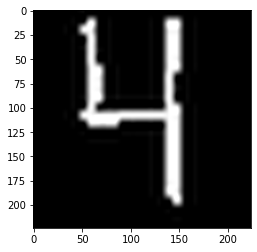

4.png


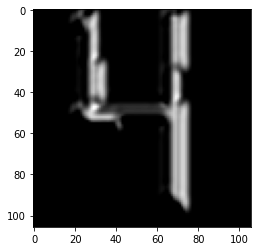

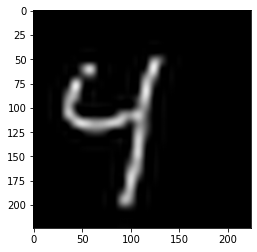

4four.png


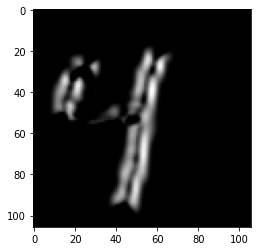

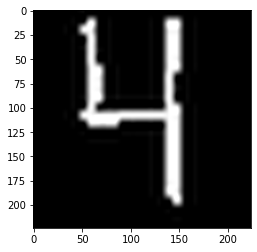

4i.png


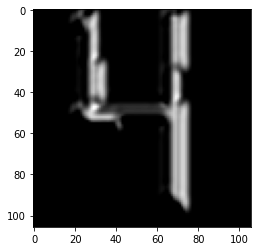

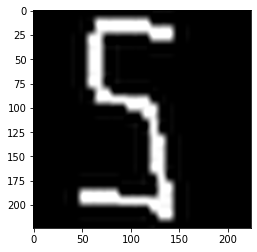

5.png


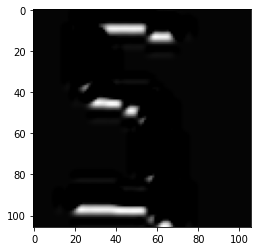

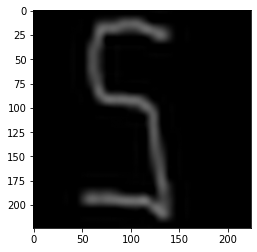

5b.png


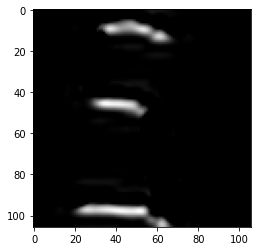

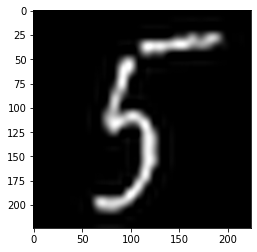

5five.png


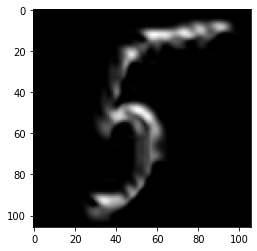

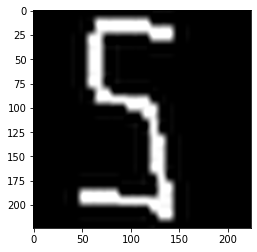

5i.png


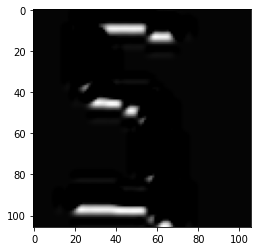

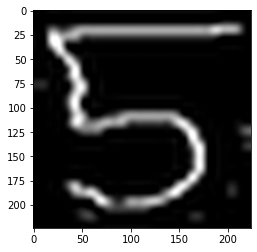

5w.png


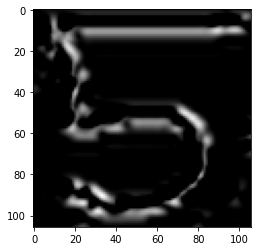

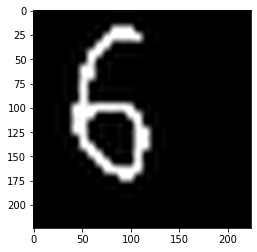

6.png


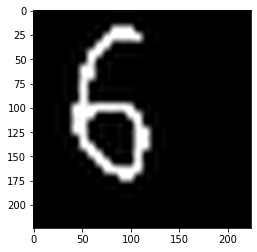

6i.png


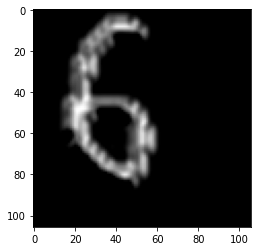

6six.png


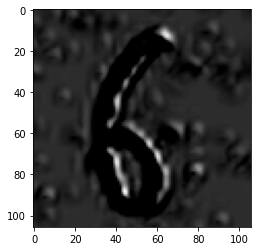

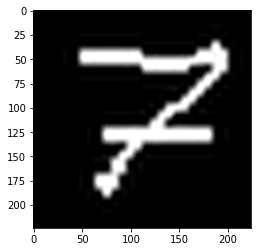

7.png


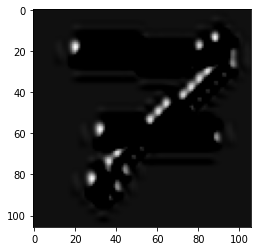

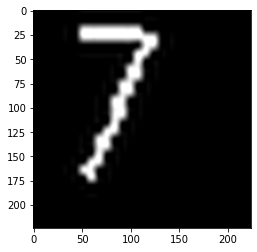

77.png


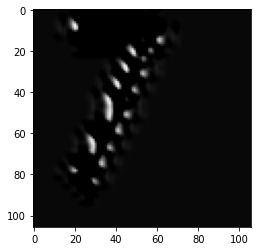

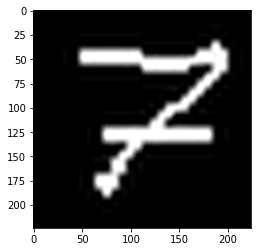

7i.png


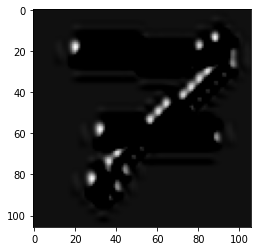

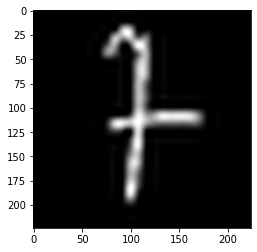

7seven.png


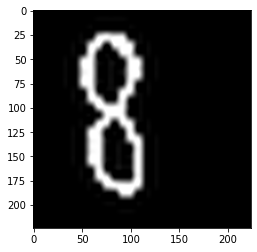

8.png


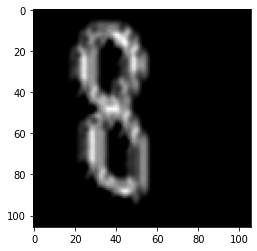

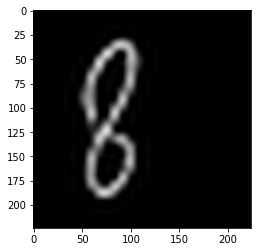

8eight.png


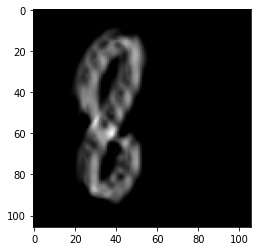

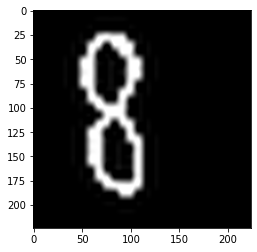

8i.png


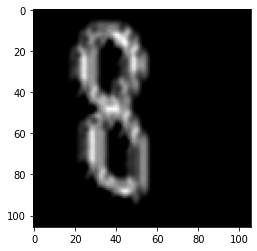

9.png


9i.png


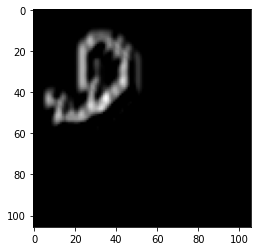

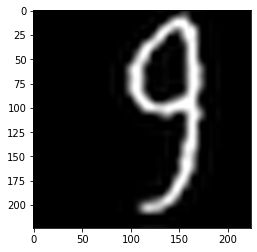

9nine.png


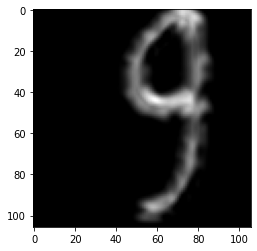

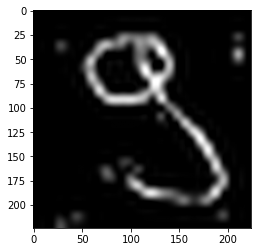

9w.png


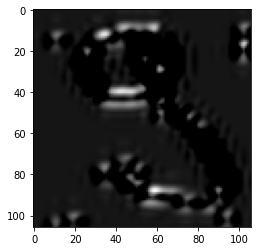

In [11]:
for f in files:
    img_path = os.path.join(folder, f)
    img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    img = np.array(img)/255  
#     img = np.array(img)  # for es_func_exp.h5
    plt.imshow(img)
    plt.show()
    print(f)
    img = np.expand_dims(img, axis=0)
    gradcam_viz(model,img)
    plt.show()

/tmp/ipykernel_154498/3405980238.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')


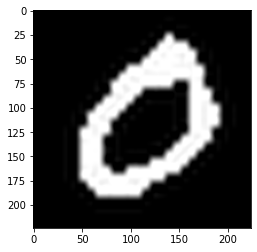

0.png
0


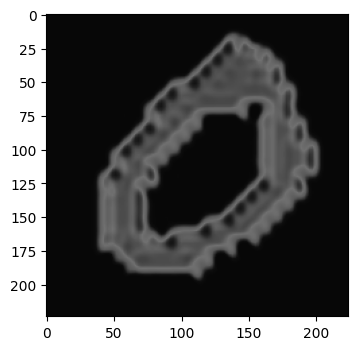

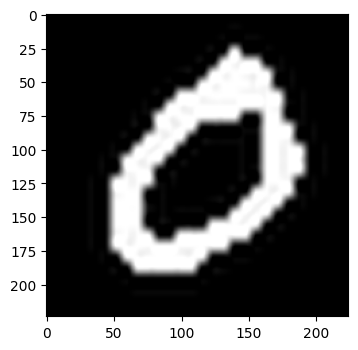

0i.png
0


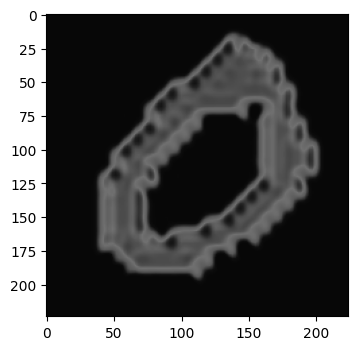

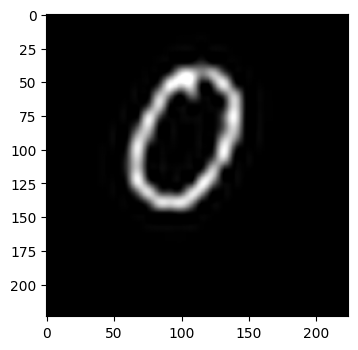

0zero.png
0


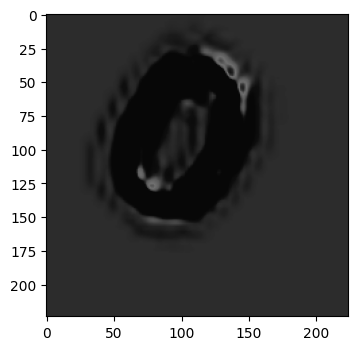

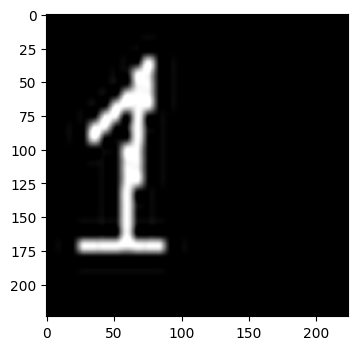

1.png
1


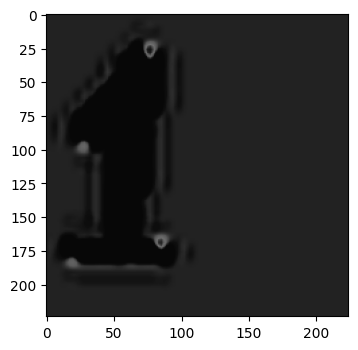

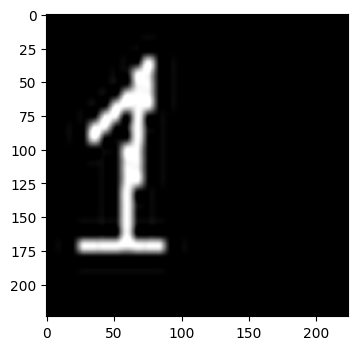

1i.png
1


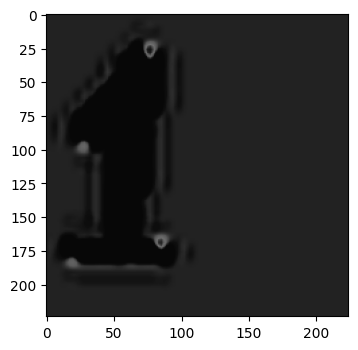

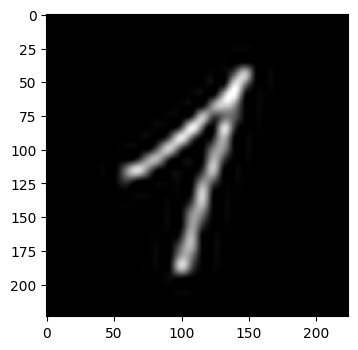

1one.png
1


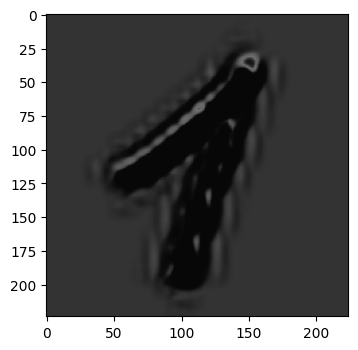

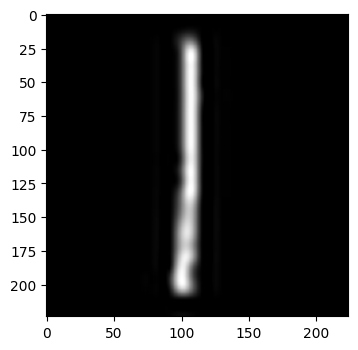

1oneone.png
1


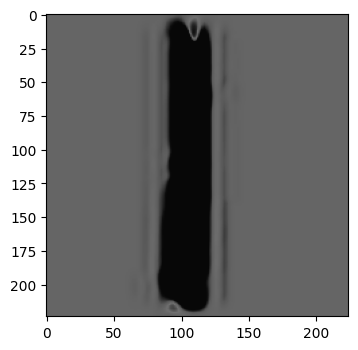

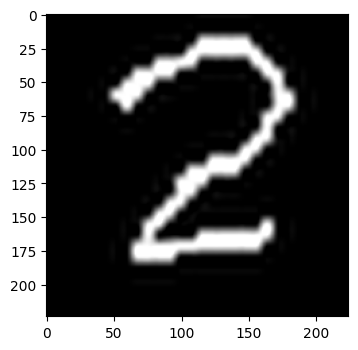

2.png
2


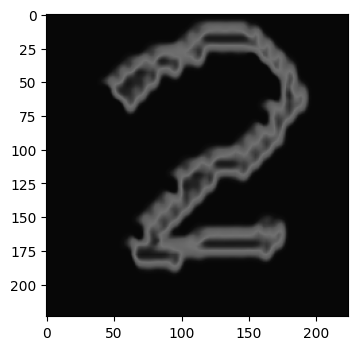

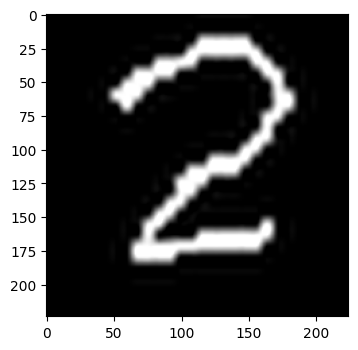

2i.png
2


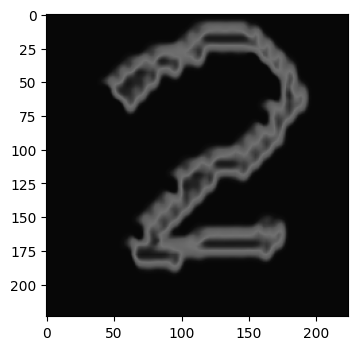

2two.png
2


3.png
3


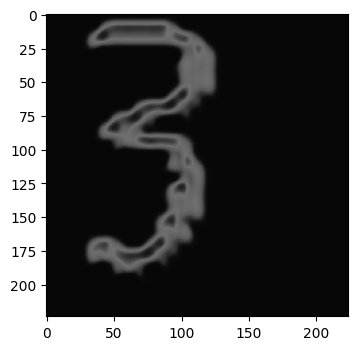

3i.png
3


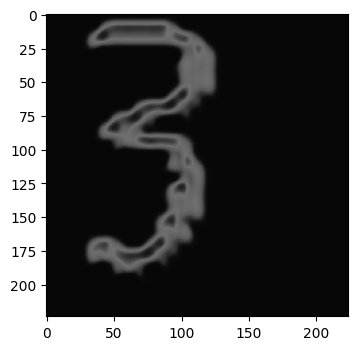

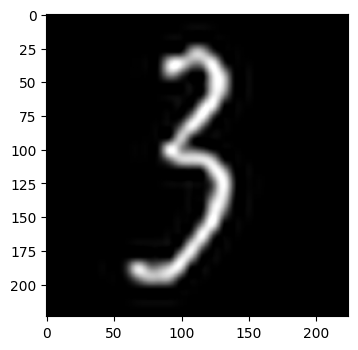

3three.png
3


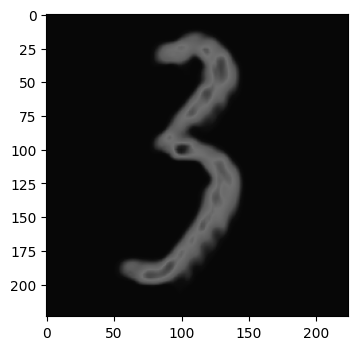

4.png
4


4four.png
4


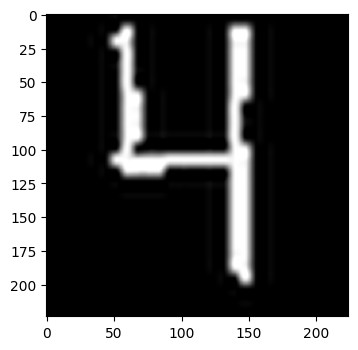

4i.png
4


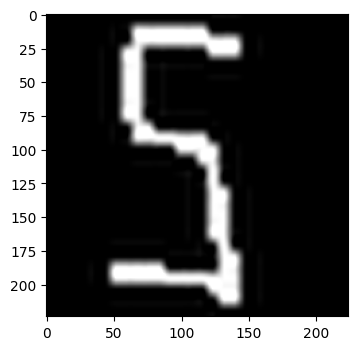

5.png
5


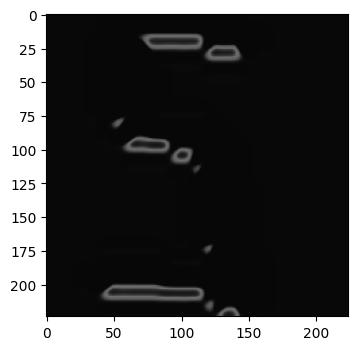

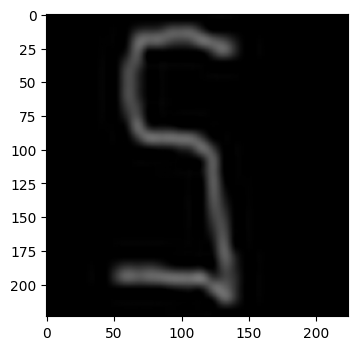

5b.png
5


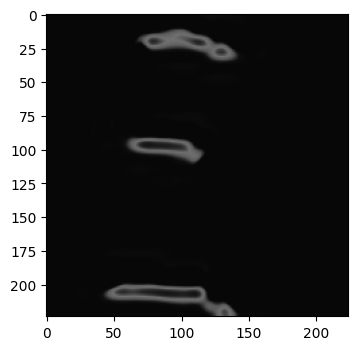

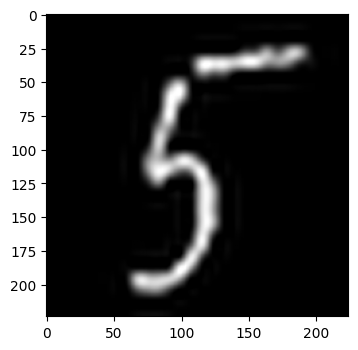

5five.png
5


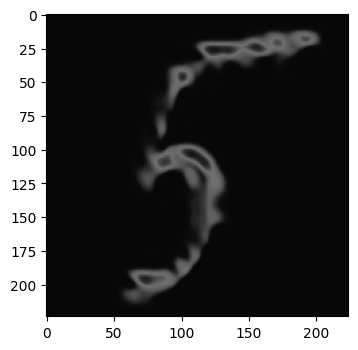

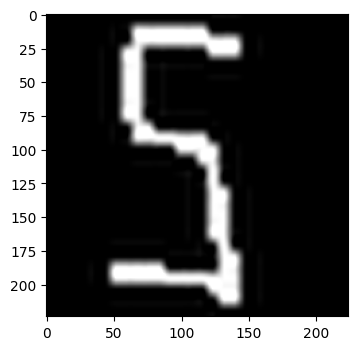

5i.png
5


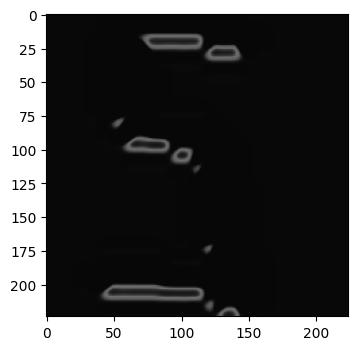

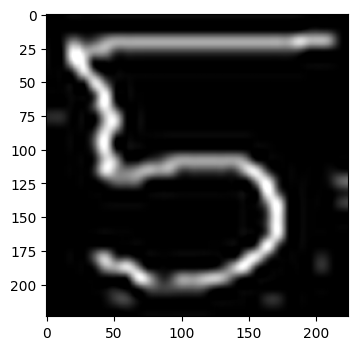

5w.png
5


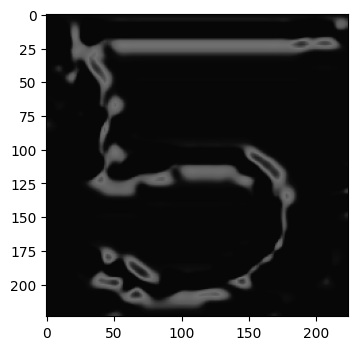

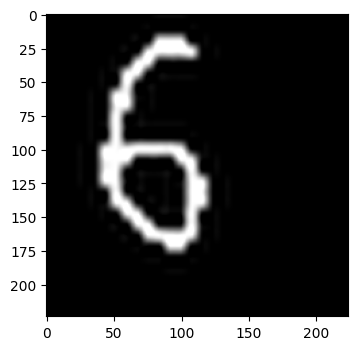

6.png
6


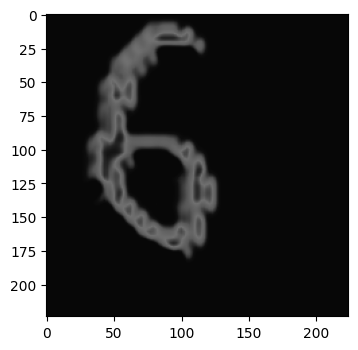

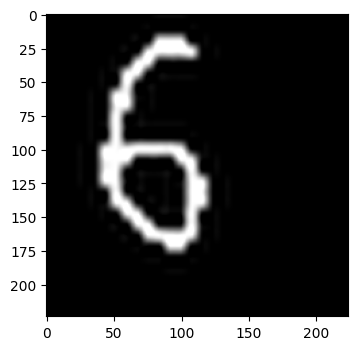

6i.png
6


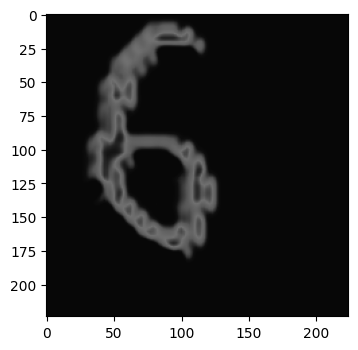

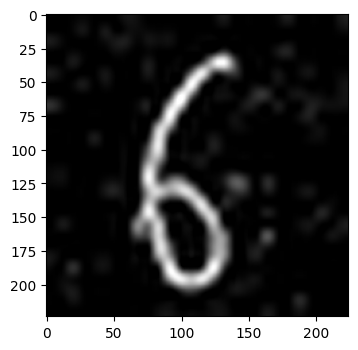

6six.png
6


7.png
7


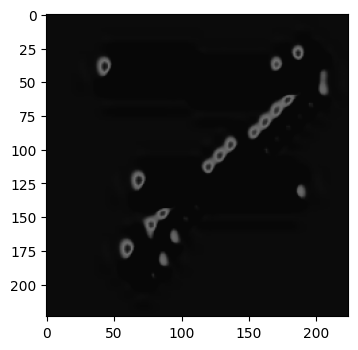

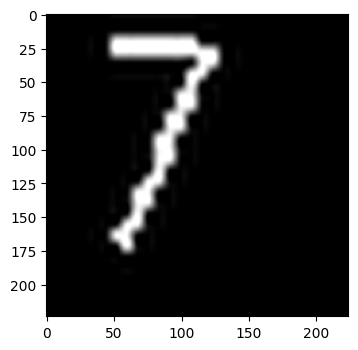

77.png
7


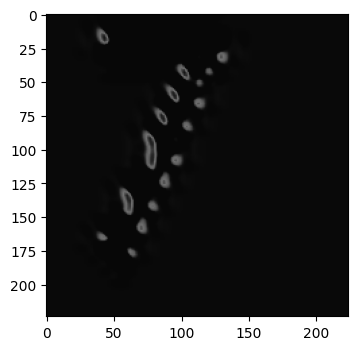

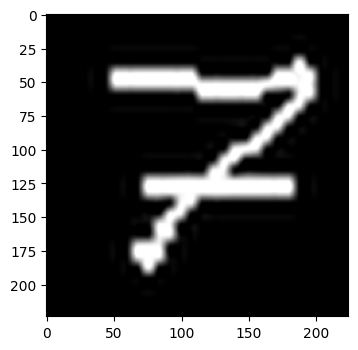

7i.png
7


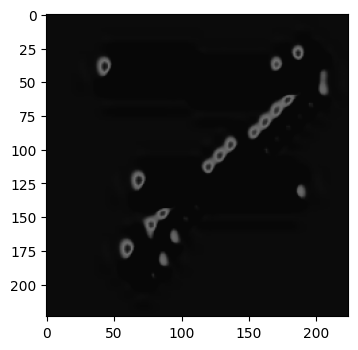

7seven.png
7


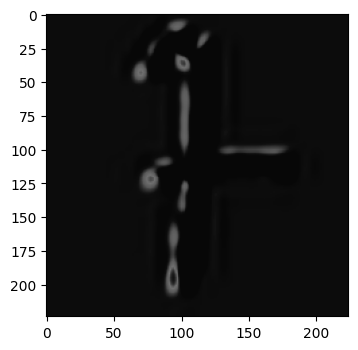

8.png
8


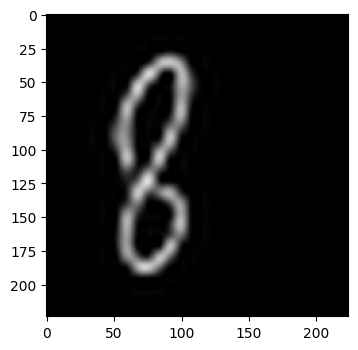

8eight.png
8


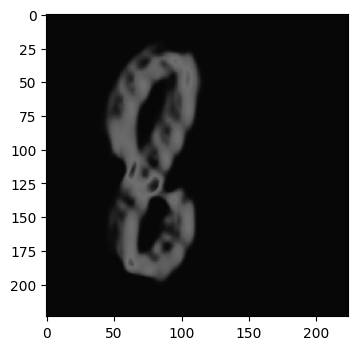

8i.png
8


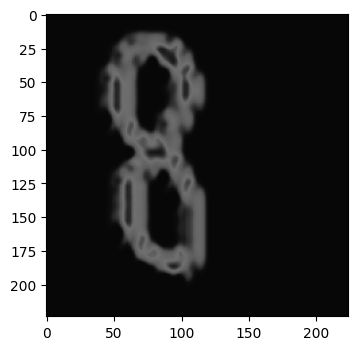

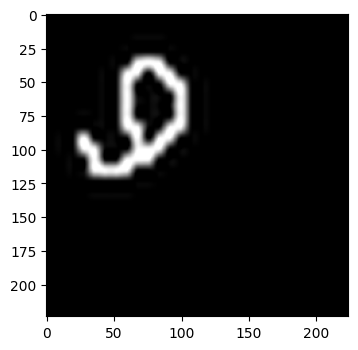

9.png
9


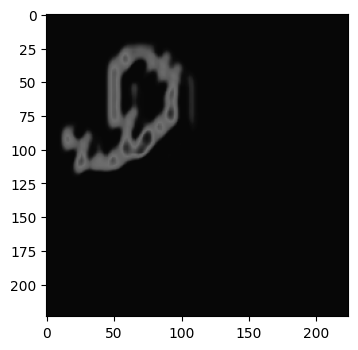

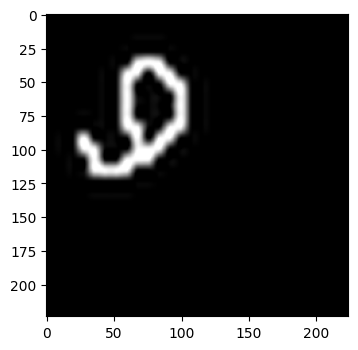

9i.png
9


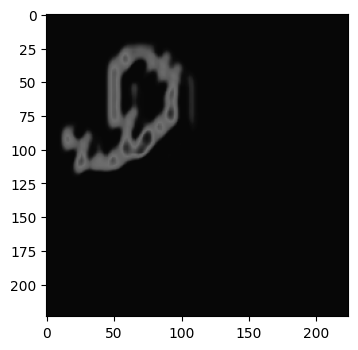

9nine.png
9


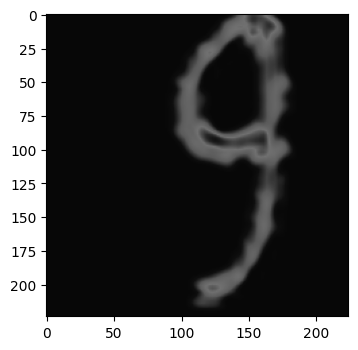

9w.png
3


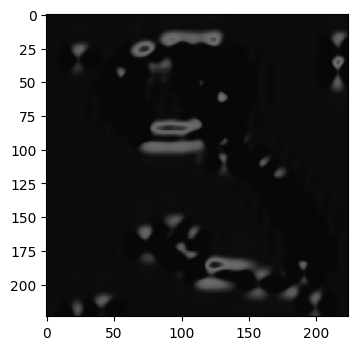

In [12]:
for f in files:
    img_path = os.path.join(folder, f)
    img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    img = np.array(img)/255  
#     img = np.array(img)  # for es_func_exp.h5
    plt.imshow(img)
    plt.show()
    print(f)
    VizGradCAM(
        model,
        img,
        plot_results=False
    )
    plt.show()